In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)

In [2]:
data = load_wine()
X,y = data.data, data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)


In [3]:
clf = Pipeline([('scaler',StandardScaler()),
                ('knn',KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2))])

In [4]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [5]:
accuracy_score(y_test,y_pred)

1.0

In [6]:
cm= confusion_matrix(y_test,y_pred)

#### tune K values

In [7]:
k_values = range(1,42)
accs = []
for k in k_values:
    model = Pipeline([
        ('scaler',StandardScaler()),
        ('knn',KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accs.append(accuracy_score(y_test,y_pred))

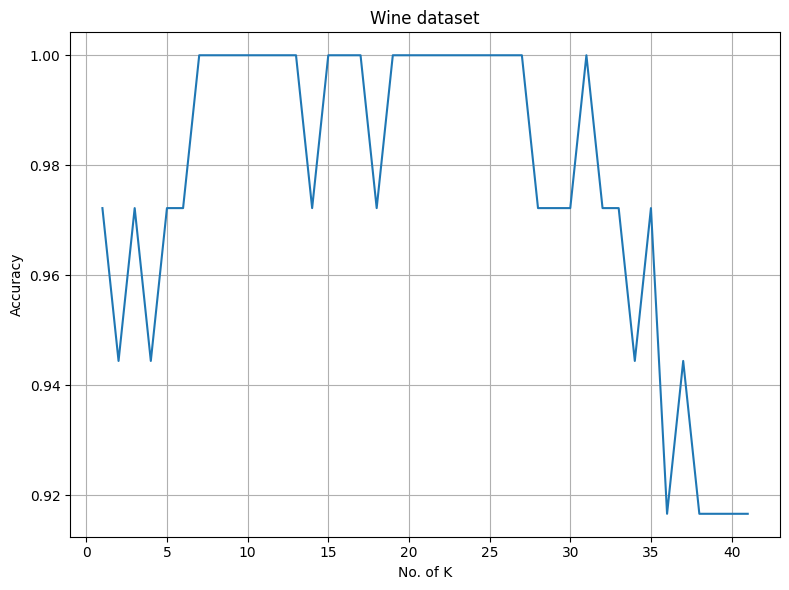

In [8]:
plt.figure(figsize=(8,6))
plt.plot(list(k_values),accs)
plt.xlabel('No. of K')
plt.ylabel('Accuracy')
plt.title('Wine dataset')
plt.grid()
plt.tight_layout()
plt.show()
best_k = list(k_values)[int(np.argmax(accs))]

In [11]:
k_demo = best_k

settings = [
    ('Euclidean (p=2, uniform)',
     KNeighborsClassifier(n_neighbors=k_demo, metric='minkowski', p=2, weights='uniform')),

    ('Manhattan (p=1, uniform)',
     KNeighborsClassifier(n_neighbors=k_demo, metric='minkowski', p=1, weights='uniform')),

    ('Euclidean (p=2, distance)',
     KNeighborsClassifier(n_neighbors=k_demo, metric='minkowski', p=2, weights='distance'))
]

rows = []

for name, knn in settings:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', knn)
    ])
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rows.append([name,accuracy_score(y_test,y_pred)])


In [13]:
df = pd.DataFrame(rows,columns=['Setting','Accuracy']).sort_values('Accuracy',ascending=False)

In [14]:
df.head()

,Setting,Accuracy
0,"Euclidean (p=2, uniform)",1.0
1,"Manhattan (p=1, uniform)",1.0
2,"Euclidean (p=2, distance)",1.0
